In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [4]:
df = pd.read_csv(r'D:/Courses/DataViz/auto_clean.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [6]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [7]:
#Now let us try to find relationships between some trivial variables like price-power, price-enginesize, engine size - mpg etc

(0, 49584.84160743655)

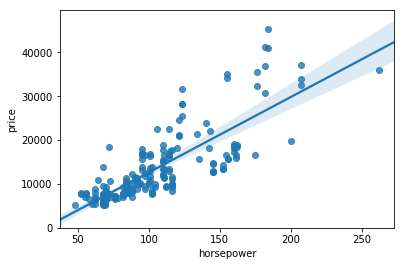

In [8]:
sns.regplot(x = 'horsepower',y = 'price',data = df)
plt.ylim(0,)

In [9]:
# As price goes up horse power goes up with some exceptions at 150-200 hp mark. Horse power could br potential predictor

In [12]:
df[["horsepower", "price"]].corr()

,horsepower,price
horsepower,1.000000,0.809575
price,0.809575,1.000000


(0, 56283.7079827792)

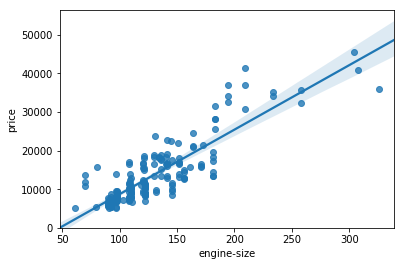

In [11]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [ ]:
# As price goes up Enginesize goes up engine size could br potential predictor, This resembles the real life, higher the price better
# performance

(0, 47716.98191738204)

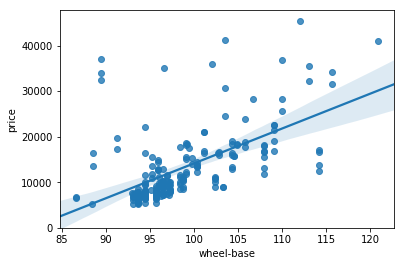

In [13]:
sns.regplot(x="wheel-base", y="price", data=df)
plt.ylim(0,)

In [ ]:
#Interesting, larger the wheel base, higher the price. Generally expensive cars have longer wheel base with some exceptions
#High performance cars can have shorter wheel base

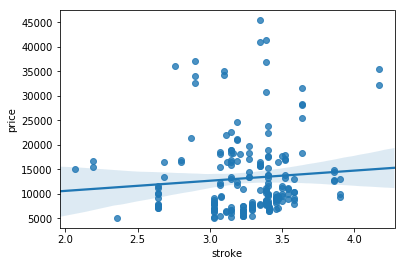

In [14]:
#Stroke is a weak predictor of price
sns.regplot(x="stroke", y="price", data=df)

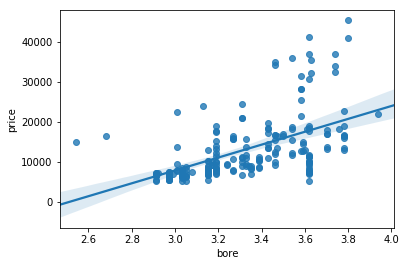

In [15]:
sns.regplot(x="bore", y="price", data=df)

In [ ]:
#In general the higher the price - higher the performance. Higher performance require big engines and larger bores for big pistons

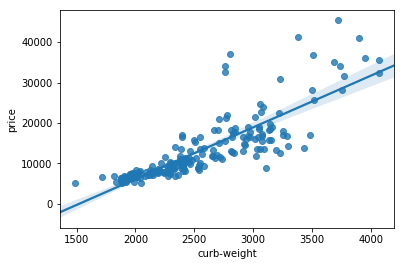

In [16]:
sns.regplot(x="curb-weight", y="price", data=df)

In [17]:
#The curb weight increases as the price increases. This can be a good predictor

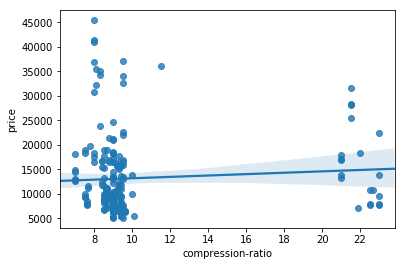

In [19]:
sns.regplot(x="compression-ratio", y="price", data=df)

In [20]:
#Compression ratio might not be a good predictor for price as compression ratio hugely depends on the type of car. Performance/luxry

(0, 48387.68850667361)

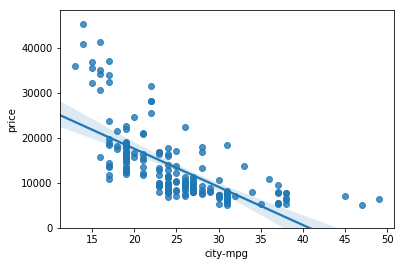

In [23]:
sns.regplot(x="city-mpg", y="price", data=df)
plt.ylim(0,)

In [27]:
#Lower priced cars tend to be more fuel economical and as the price goes up economy decreases in general
#The same with highway mpg as well
#This can be a good predictor

(0, 48295.2592845068)

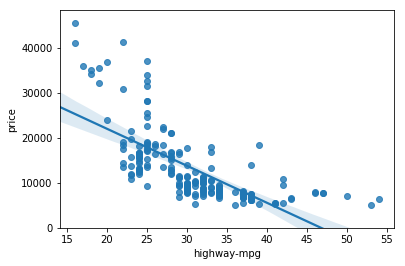

In [26]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [28]:
#Now lets visualize categorical variables

(0, 68384.28725165263)

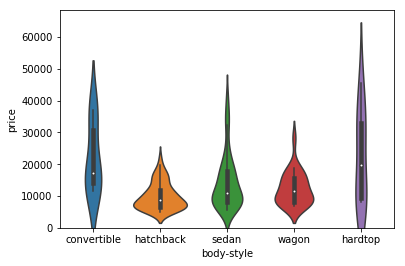

In [30]:
sns.violinplot(x="body-style", y="price", data=df)
plt.ylim(0,)

(0, 47414.1)

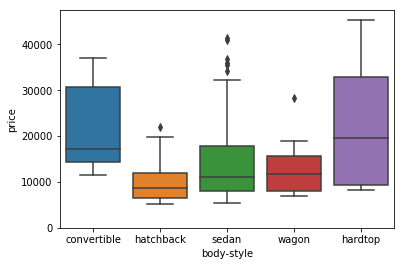

In [31]:
sns.boxplot(x="body-style", y="price", data=df)
plt.ylim(0,)

In [32]:
#We can see lot of overlap in body types. Some sedan body styles are equally pries with convertible and hardtop. This might not
#be a good predictor

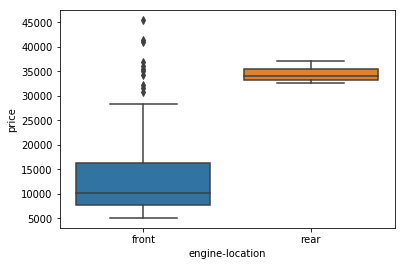

In [33]:
sns.boxplot(x="engine-location", y="price", data=df)

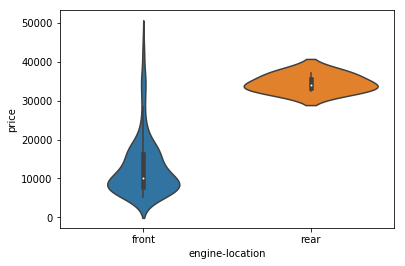

In [35]:
sns.violinplot(x="engine-location", y="price", data=df)

In [36]:
#rear end engine cars are high priced

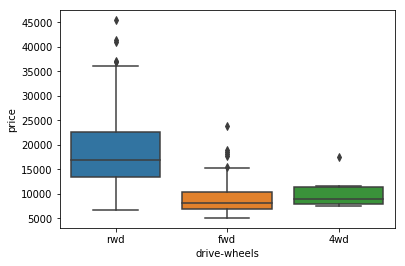

In [37]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

In [38]:
#Rear end driving cars are high priced, now let us see how rear end engine and rear drive cars are priced

In [63]:
def rear_eng_drive(x,y):
    if x == 'rwd' and y == 'rear':
        return  'rear_engine_rear_wheel_drive'
    elif x == 'rwd' and y == 'front':
        return 'front_eng_rear_wheel_drive'
    else:
        return 'other_type'

In [64]:
df['rear_eng_drive'] = df.apply(lambda x: rear_eng_drive(x['drive-wheels'], x['engine-location']), axis=1)

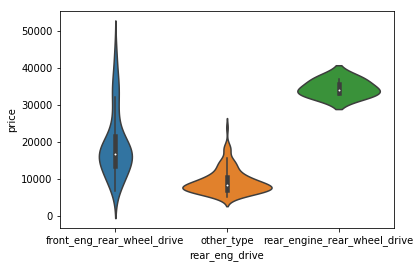

In [65]:
sns.violinplot(x="rear_eng_drive", y="price", data=df)

In [66]:
#We can see the rear_engine rear wheel drive are prices highly and hront engine rear wheel drive cars are mostly priced around
#10000 to 25000 and there highly priced cars asw ell in the same segment

In [67]:
def rear_eng_drive(x,y):
    if x == '4wd' and y == 'rear':
        return  'rear_engine_4w_drive'
    elif x == '4wd' and y == 'front':
        return 'front_eng_4wd'
    else:
        return 'other_type'

In [68]:
df['rear_eng_drive'] = df.apply(lambda x: rear_eng_drive(x['drive-wheels'], x['engine-location']), axis=1)

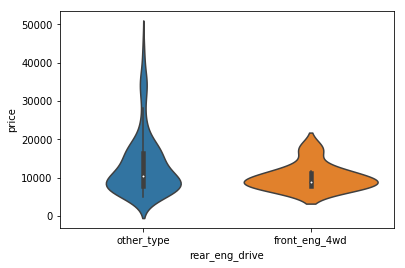

In [69]:
sns.violinplot(x="rear_eng_drive", y="price", data=df)

In [ ]:
#We can see that 4wd cars exists only with front engine and they are not priced too high.

In [ ]:
#Now we will go into some statistical analysis methods to understand correlations between variables

In [70]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [97]:
df.groupby('drive-wheels')['drive-wheels'].count().to_frame()

,drive-wheels
drive-wheels,
4wd,8
fwd,118
rwd,75


In [95]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [104]:
#Let us see average pricing for based on drive_wheels

df.groupby(['drive-wheels'],as_index=False)['drive-wheels','price'].mean()

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [105]:
df.groupby(['drive-wheels','body-style'],as_index=False)['drive-wheels','price'].mean()

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286
